<a href="https://colab.research.google.com/github/kalebcwag/Sneakers-and-Streetwears-Sales-Analytics/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sneakers and streetwear sales data analytics

#### Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/sneakers-and-streetwear-sales-2022

## A project for my data analytical and prompt programming portfolio. Thought of these questions myself based on what could I possibly gain from the data. The code was made with the help of Colab's Gemini AI, with adjustments if needed. If the block of codes was generated with AI, the prompts would be written on the first line of each blocks of code.

Questions:
<ol>
<li>Which type of sneakers did Nike sell the most?</li>
<li>Which company had the most unisex products?</li>
<li>Which type of payment do the Japanese prefer?</li>
<li>Which company sold the most product in 2022?</li>
<li>How much did the company gain throughout 2022?</li>
<li>Is there any company that gained more money eventhough they sold less product? If yes, what is it?</li>
<li>How many types of product in this data?</li>
<li>How many units of "Fear of God Essentials Tee" sold in the third quarter of 2022?</li>
<li>Which payment method was the least relevant in 2022?</li>
<li>How was the growth of each company throughout each month 2022?</li>
</ol>

# Collect data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/sneakers-and-streetwear-sales-2022")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sneakers-and-streetwear-sales-2022


# Import libraries

In [ ]:
import pandas
import matplotlib.pyplot as plt

# Preview data

In [ ]:
df = pandas.read_csv(path + "/sneakers_streetwear_sales_data.csv")
df

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...
348,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet
349,2022-08-03,Nike Tech Fleece,Hoodie,Nike,Women,Casual,Germany,5,259.00,1295.00,Card
350,2022-05-05,Puma Joggers,Joggers,Puma,Women,Casual,Germany,4,299.73,1198.92,Cash on Delivery
351,2022-05-19,Adidas Ultraboost,Sneakers,Adidas,Men,Casual,Canada,5,71.26,356.30,Cash on Delivery


# Q1: Which type of sneakers did Nike sell the most?

In [ ]:
sneakers_data = df[(df["Brand"] == "Nike") & (df["Product Type"] == "Sneakers")]
sneakers_data.reset_index(drop=True, inplace=True)

sneakers_data

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
1,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
2,2022-06-20,Jordan 1 High,Sneakers,Nike,Women,Streetwear,USA,3,199.47,598.41,Wallet
3,2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet
4,2022-08-26,Nike Dunk Low,Sneakers,Nike,Women,Casual,Germany,3,295.75,887.25,Card
...,...,...,...,...,...,...,...,...,...,...,...
61,2022-03-01,Jordan 1 High,Sneakers,Nike,Women,Sportswear,Canada,3,235.36,706.08,Wallet
62,2022-01-01,Nike Dunk Low,Sneakers,Nike,Women,Streetwear,Japan,2,294.89,589.78,Wallet
63,2022-03-10,Jordan 1 High,Sneakers,Nike,Women,Sportswear,USA,1,208.24,208.24,Cash on Delivery
64,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet


In [ ]:
sneakers_data_by_names = sneakers_data.groupby("Product Name", as_index=False).sum()

sneakers_data_by_names = sneakers_data_by_names[["Product Name", "Quantity"]]

sneakers_data_by_names

,Product Name,Quantity
0,Jordan 1 High,113
1,Nike Dunk Low,112


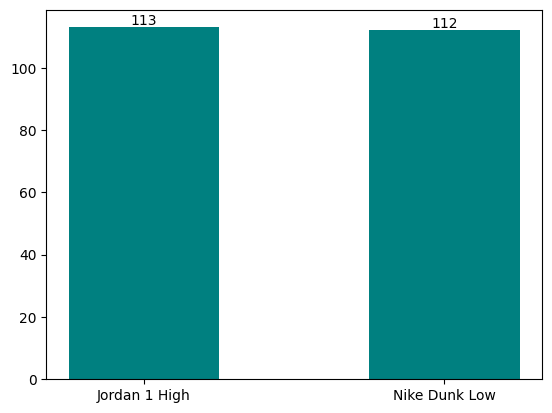

In [ ]:
plt.bar(sneakers_data_by_names["Product Name"], sneakers_data_by_names["Quantity"], width=0.5, color="teal")
plt.xticks(rotation=0)
plt.margins(x=0.05)

for i, value in enumerate(sneakers_data_by_names["Quantity"]):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

#Q2: Which company had the most unisex products?

In [ ]:
unisex_products = df[(df["Gender"] == "Unisex")]
unisex_products.reset_index(drop=True, inplace=True)

unisex_products

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet
3,2022-02-08,Supreme Hoodie,Hoodie,Supreme,Unisex,Casual,India,1,54.44,54.44,Cash on Delivery
4,2022-08-25,Adidas Ultraboost,Sneakers,Adidas,Unisex,Casual,USA,1,104.16,104.16,Wallet
...,...,...,...,...,...,...,...,...,...,...,...
87,2022-01-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Limited Edition,India,4,206.29,825.16,Wallet
88,2022-01-14,Puma Joggers,Joggers,Puma,Unisex,Limited Edition,Australia,5,289.47,1447.35,Card
89,2022-06-06,Nike Tech Fleece,Hoodie,Nike,Unisex,Limited Edition,Germany,5,123.23,616.15,Wallet
90,2022-06-29,Off-White Hoodie,Hoodie,Off-White,Unisex,Sportswear,Germany,2,54.76,109.52,Wallet


In [ ]:
unisex_products = unisex_products[["Brand", "Gender"]]
unisex_products_count = unisex_products[unisex_products["Gender"] == "Unisex"]["Brand"].value_counts()

unisex_products_count

array([26, 21, 12, 11, 10,  6,  6])

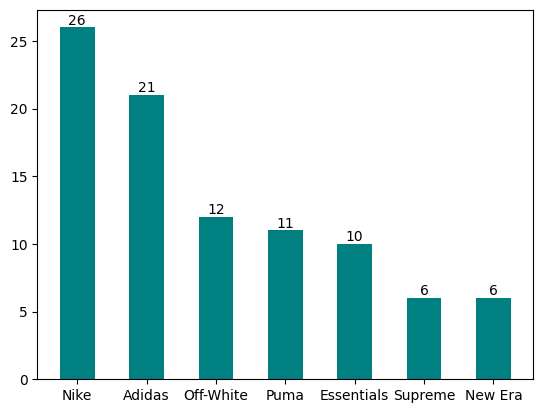

In [ ]:
plt.bar(unisex_products_count.index, unisex_products_count.values, width=0.5, color="teal")
plt.xticks(rotation=0)
plt.margins(x=0.05)

for i, value in enumerate(unisex_products_count.values):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

# Q3: Which type of payment do the Japanese prefer?

# Q4: Which company sold the most product in 2022?

#Q5: How much did the company gain throughout 2022?

#Q6: Is there any company that gained more money eventhough they sold less product? If yes, what is it?

#Q7: How many types of product in this data?

#Q8: How many units of "Fear of God Essentials Tee" sold in the third quarter of 2022?

#Q9: Which payment method was the least relevant in 2022?

#Q10: How was the growth of each company throughout each month 2022?